# Text Classification

## Library Imports

In [91]:
# Import Os to get to the root directory
import os
import sys

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)
TEST_DIR = os.path.join(ROOT_DIR, "test-white-papers")
MODEL_DIR = os.path.join(ROOT_DIR, "model")

# Import own functions
from libraries import corpus
from libraries import pdf2text

# Import other libraries
import nltk 
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [7]:
from importlib import reload
reload(pdf2text)

<module 'libraries.pdf2text' from 'D:\\Dropbox\\Masters\\BIPM\\2 Semester\\Text, Web and Social Media Analytics\\Project\\datascience_project\\libraries\\pdf2text.py'>

## Data Preprocessing

In [5]:
dataset = pdf2text.get_dataset()

In [8]:
train = pdf2text.get_dataset(path=TEST_DIR)

In [9]:
dataset.keys()

dict_keys(['#metahash', '0x', 'abbccoin', 'aion', 'apollocurrency', 'ardor', 'ark', 'basicattentiontoken', 'bhpcoin', 'binancecoin', 'bitcoin', 'bitcoingold', 'bitshares', 'bittorrent', 'bytecoin', 'bytom', 'celernetwork', 'chainlink', 'cosmocoin', 'cosmos', 'crypto', 'cryptonex', 'dai', 'dash', 'decentraland', 'dent', 'digixdao', 'dogecoin', 'elastos', 'enjincoin', 'eos', 'ethereum', 'ethereumclassic', 'factom', 'fantom', 'gnosis', 'golem', 'gxchain', 'holo', 'horizen', 'hypercash', 'hyperion', 'icon', 'iexecrlc', 'inocoin', 'iota', 'japancontenttoken', 'komodo', 'latoken', 'lina', 'loopring', 'maidsafecoin', 'maker', 'metal', 'metaverseetp', 'mixin', 'monero', 'nano', 'nebulas', 'nem', 'nexo', 'nkn', 'obyte', 'omisego', 'ontology', 'orbs', 'particl', 'paxosstandardtoken', 'powerledger', 'pundix', 'ravencoin', 'riftoken', 'siacoin', 'singularitynet', 'skycoin', 'solve', 'status', 'steem', 'stellar', 'stratis', 'synthetixnetworktoken', 'tenx', 'tether', 'tezos', 'theta', 'thetafuel', '

In [10]:
len(dataset.keys())

99

In [11]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = True
# Creates a dictionary with each White Paper and its text pre-processed
corpora = corpus.makeCleanCorpus(dataset, lemmatize=True, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luisd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: #metahash
Cleaning: 0x
Cleaning: abbccoin
Cleaning: aion
Cleaning: apollocurrency
Cleaning: ardor
Cleaning: ark
Cleaning: basicattentiontoken
Cleaning: bhpcoin
Cleaning: binancecoin
Cleaning: bitcoin
Cleaning: bitcoingold
Cleaning: bitshares
Cleaning: bittorrent
Cleaning: bytecoin
Cleaning: bytom
Cleaning: celernetwork
Cleaning: chainlink
Cleaning: cosmocoin
Cleaning: cosmos
Cleaning: crypto
Cleaning: cryptonex
Cleaning: dai
Cleaning: dash
Cleaning: decentraland
Cleaning: dent
Cleaning: digixdao
Cleaning: dogecoin
Cleaning: elastos
Cleaning: enjincoin
Cleaning: eos
Cleaning: ethereum
Cleaning: ethereumclassic
Cleaning: factom
Cleaning: fantom
Cleaning: gnosis
Cleaning: golem
Cleaning: gxchain
Cleaning: holo
Cleaning: horizen
Cleaning: hypercash
Cleaning: hyperion
Cleaning: icon
Cleaning: iexecrlc
Cleaning: inocoin
Cleaning: iota
Cleaning: japancontenttoken
Cleaning: komodo
Cleaning: latoken
Cleaning: lina
Cleaning: loopring
Cleaning: maidsafecoin
Cleaning: maker
Cleaning: met

In [29]:
df = pd.DataFrame(columns=["Text","Protocol"])


In [30]:
i=0
for k, v in enumerate(corpora):
    for sent in corpora[v]:
        df.loc[i, "Text"] = sent
        df.loc[i, "Protocol"] = v
    
        i += 1

In [32]:
df.shape

(42704, 2)

## Methods Application

### Cluster Prediction

This is an unsupervised approach on Text Classification.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [10]:
# Add ALL the documents into one single array
final = []
for k in corpora.keys():
    for i in corpora[k]:
        final += [i]
len(final)

22894

In [58]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpora.values())

In [56]:
dtm = corpus.makeDTM(corpora, tfidf=True)

In [57]:
dtm

,aa,aac,aacs,aand,aapl,aaron,ab,abadi,abandon,abandoned,...,zucker,zuckerberg,zug,zulkamal,zv,zverev,zvonareva,zxc,zynga,zz
0chain,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1World,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1x2Coin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AB-CHAIN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABCC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABLE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Absolute,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ACE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002933,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003474,0.006948,0.000000,0.000000,0.000000
Achain,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AcreCoin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [60]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [62]:
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :3]:
        print(" %s" % terms[ind])

Cluster 0:
 advertising
 advertisers
 ad
Cluster 1:
 aditus
 golem
 budbo
Cluster 2:
 bitcoin
 coin
 block
Cluster 3:
 nodes
 icon
 pov
Cluster 4:
 blockchain
 block
 network


In [63]:
print("\n")
print("Prediction")
X = vectorizer.transform(corpora_sent["Vechain"])
predicted = model.predict(X)
print(predicted)



Prediction
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4

### Text Classification with Existing Model

In [9]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [10]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer

In [14]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',MultinomialNB())])
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(twenty_train.data, twenty_train.target)

In [30]:
predicted = gs_clf.predict(corpora_sent["0chain"])

In [31]:
predicted

array([11, 11, 11, 12, 10,  6, 18,  4, 11, 11, 11,  4, 11, 11, 11, 11, 11,
        0, 11, 11, 11,  4, 11, 11, 11,  8,  1, 18, 11, 14, 14,  1,  1, 14,
       11,  4, 11,  2,  2, 11, 11,  6, 11, 11, 18,  7, 11, 14, 13,  6, 11,
       17, 11,  6, 11, 11,  5, 18, 18,  5, 14, 18, 11, 11,  8,  2, 13,  5,
       11, 14, 11, 14, 11, 11, 11, 11,  5, 11,  5, 11,  5, 11, 11,  4, 11,
        4, 11, 14, 11, 11,  2, 11, 14, 11, 11, 18,  8, 18,  2, 15, 14, 15,
       11, 11, 11, 14, 14,  5, 11, 12, 11,  8,  4,  2, 11, 14, 11, 11,  5,
        6, 11, 11,  2, 11, 14, 17,  5, 16, 10, 14,  1, 10, 17, 11, 14, 18,
       10,  3,  2, 14, 11, 14,  1, 11,  5, 13, 11, 11, 18, 11,  2, 17, 11,
        2,  5,  2, 11, 14, 14, 11,  1, 11, 11, 18, 14,  0, 11, 10,  1, 11,
       11,  2, 11, 11, 11, 10,  7, 11, 14, 14,  4, 11, 14, 11, 11, 11, 11,
       11, 11,  7, 14, 11, 11, 11, 11, 11, 12, 14, 14, 13, 11, 11, 14,  2,
        5, 16,  1,  5, 11, 14, 11, 15,  5, 11, 11,  5, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11

In [33]:
import pandas as pd
p = pd.DataFrame()

p["text"] = corpora_sent["0chain"]
p["target"] = predicted

In [35]:
a = pd.DataFrame()

a["label"] = twenty_train.target_names

In [36]:
a = a.reset_index()

In [37]:
a.columns=["target","label"]

In [38]:
f = pd.merge(p,a, how='inner', on="target")

In [42]:
f[f.target==13]

,text,target,label
281,creates challenging process accurate price dis...,13,sci.med
282,enterprise market today blockchain solutions e...,13,sci.med
283,tb,13,sci.med
284,finally chain consensus protocol makes mild as...,13,sci.med
285,eventually one side exceed threshold side matc...,13,sci.med
286,experiments associated data points provide emp...,13,sci.med


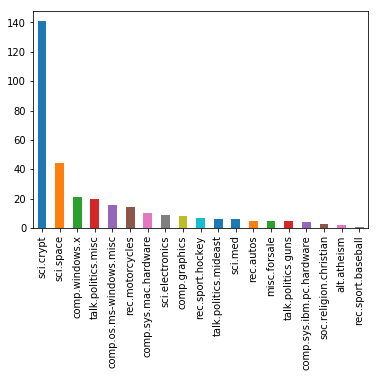

In [39]:
f['label'].value_counts().plot('bar')

### Text Classification with Blockchain Protocol

Here, we will use the pdf's to try and see if we can predict how similar are the pdf's
The dataset will be X = text or sentences (try both approaches), Y = respective protocol

We will try to evaluate a % similarity of existing protocols, for new protocols, and the investors can then assess 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
df.head()

,Text,Protocol
0,yellow paper technical documentation version g...,#metahash
1,building nerk test,#metahash
2,bulk transaction verification latency test,#metahash
3,nerk failure test,#metahash
4,blockage nerk recovery test result nerk descri...,#metahash


In [62]:
X = df.Text
y = df.Protocol
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 100, stratify=y)

In [58]:
labels = list(corpora.keys())

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [64]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=labels))

accuracy 0.30488233227959255
                       precision    recall  f1-score   support

            #metahash       0.92      0.23      0.37       105
                   0x       0.00      0.00      0.00        51
             abbccoin       0.00      0.00      0.00        50
                 aion       1.00      0.20      0.34        99
       apollocurrency       0.00      0.00      0.00        31
                ardor       0.81      0.31      0.45        93
                  ark       0.78      0.26      0.39       154
  basicattentiontoken       0.84      0.33      0.47       124
              bhpcoin       0.00      0.00      0.00        40
          binancecoin       0.00      0.00      0.00        35
              bitcoin       0.00      0.00      0.00        29
          bitcoingold       0.00      0.00      0.00        25
            bitshares       0.00      0.00      0.00        16
           bittorrent       1.00      0.02      0.03        61
             bytecoin    

In [66]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [67]:
%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=labels))

accuracy 0.5216016859852476
                       precision    recall  f1-score   support

            #metahash       0.59      0.60      0.60       105
                   0x       0.50      0.22      0.30        51
             abbccoin       0.44      0.22      0.29        50
                 aion       0.62      0.62      0.62        99
       apollocurrency       0.67      0.32      0.43        31
                ardor       0.50      0.57      0.53        93
                  ark       0.53      0.50      0.52       154
  basicattentiontoken       0.52      0.60      0.56       124
              bhpcoin       0.60      0.38      0.46        40
          binancecoin       0.31      0.14      0.20        35
              bitcoin       0.35      0.38      0.37        29
          bitcoingold       0.46      0.24      0.32        25
            bitshares       0.75      0.19      0.30        16
           bittorrent       0.61      0.56      0.58        61
             bytecoin     

In [68]:

from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

In [69]:
%%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=labels))

accuracy 0.45158646528509544
                       precision    recall  f1-score   support

            #metahash       0.48      0.46      0.47       105
                   0x       0.42      0.37      0.40        51
             abbccoin       0.28      0.18      0.22        50
                 aion       0.43      0.49      0.46        99
       apollocurrency       0.61      0.35      0.45        31
                ardor       0.56      0.44      0.49        93
                  ark       0.41      0.40      0.41       154
  basicattentiontoken       0.44      0.47      0.45       124
              bhpcoin       0.27      0.28      0.27        40
          binancecoin       0.12      0.14      0.13        35
              bitcoin       0.29      0.24      0.26        29
          bitcoingold       0.43      0.24      0.31        25
            bitshares       0.29      0.12      0.17        16
           bittorrent       0.60      0.51      0.55        61
             bytecoin    

In [70]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

Using TensorFlow backend.


In [71]:
train_size = int(len(df) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 34163
Test size: 8541


In [74]:
df_shuffle = df.sample(frac=1)

In [75]:
train_posts = df_shuffle['Text'][:train_size]
train_tags = df_shuffle['Protocol'][:train_size]

test_posts = df_shuffle['Text'][train_size:]
test_tags = df_shuffle['Protocol'][train_size:]

In [98]:
max_words = 20000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [99]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [ ]:
import gc

gc.collect()

In [78]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [79]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [80]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (34163, 10000)
x_test shape: (8541, 10000)
y_train shape: (34163, 99)
y_test shape: (8541, 99)


In [93]:
batch_size = 32
epochs = 5

In [82]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [94]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

Train on 30746 samples, validate on 3417 samples
Epoch 1/5
30746/30746 [==============================] - 457s 15ms/step - loss: 0.4652 - acc: 0.8734 - val_loss: 1.9126 - val_acc: 0.5631
Epoch 2/5
30746/30746 [==============================] - 150s 5ms/step - loss: 0.4002 - acc: 0.8878 - val_loss: 1.9938 - val_acc: 0.5569
Epoch 3/5
30746/30746 [==============================] - 123s 4ms/step - loss: 0.3552 - acc: 0.8976 - val_loss: 2.0897 - val_acc: 0.5569
Epoch 4/5
30746/30746 [==============================] - 145s 5ms/step - loss: 0.3183 - acc: 0.9060 - val_loss: 2.1489 - val_acc: 0.5522
Epoch 5/5
30746/30746 [==============================] - 122s 4ms/step - loss: 0.2899 - acc: 0.9121 - val_loss: 2.2469 - val_acc: 0.5487


In [95]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

8541/8541 [==============================] - 10s 1ms/step
Test accuracy: 0.5287437068677705


In [ ]:
model.save(os.path.join(MODEL_DIR, "model_blockchain_2.h5"))

- https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52
https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a
https://github.com/kavgan/nlp-in-practice/blob/master/word2vec/Word2Vec.ipynb